In [1]:
# Feature Selection in Machine Learning

# In this tutorial, we'll cover different **feature selection** methods to improve the performance of machine learning models 
# and reduce overfitting by selecting the most relevant features from the dataset. Feature selection can be grouped into three categories:

# 1. **Filter Methods**
# 2. **Embedded Methods**
# 3. **Wrapped Methods**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
# Load example dataset (e.g., breast cancer dataset)
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

In [6]:
# Basic Data Exploratory Analysis
print("Dataset Shape:", X.shape)
print("First 5 Rows of the Dataset:")
print(X.head())


Dataset Shape: (569, 30)
First 5 Rows of the Dataset:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst 

In [7]:
# Check for missing values
missing_values = X.isnull().sum()
print("Missing Values in Each Feature:")
print(missing_values[missing_values > 0])

Missing Values in Each Feature:
Series([], dtype: int64)


In [8]:
# Statistical Summary of the Dataset
print("Statistical Summary:")
print(X.describe())

Statistical Summary:
       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             

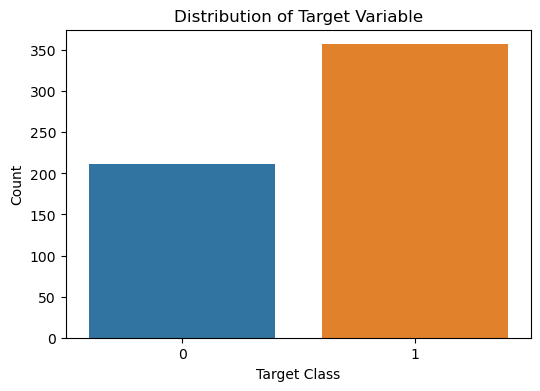

In [9]:
# Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()


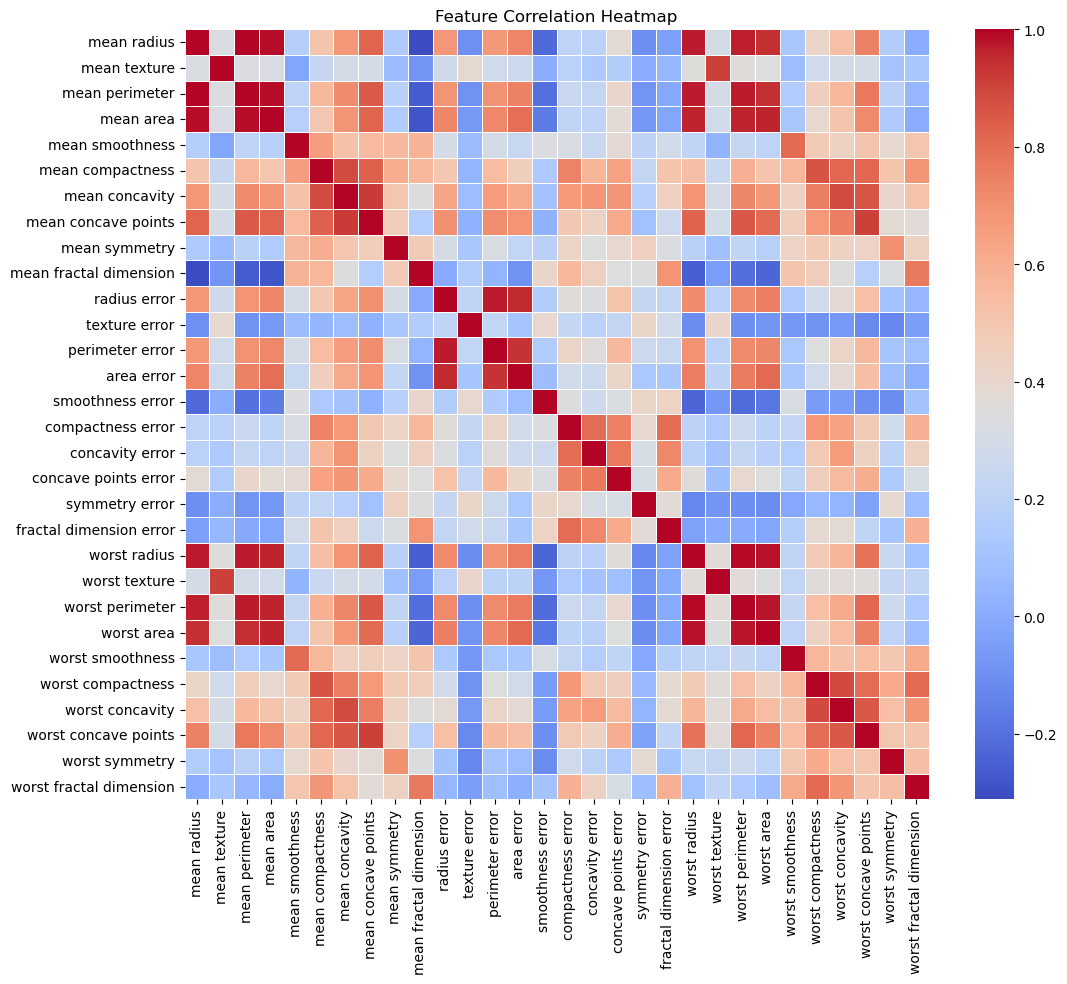

In [10]:
# Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()

In [59]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
### **1. Filter Methods**

# Filter methods are statistical approaches that select features independently of any machine learning algorithm. Here, we cover the following methods:

# - **Mutual Information**
# - **Correlation Coefficient**

In [60]:
#### **1.1. Mutual Information**

# Mutual information measures the dependency between the input feature and the target variable.

from sklearn.feature_selection import mutual_info_classif

In [61]:
# Calculate Mutual Information
mi_scores = mutual_info_classif(X_train, y_train)
mi_scores_series = pd.Series(mi_scores, index=X_train.columns).sort_values(ascending=False)

In [62]:
# Perform Feature Selection based on a threshold
mi_threshold = 0.1
selected_features_mi = mi_scores_series[mi_scores_series > mi_threshold].index
print("Selected Features using Mutual Information:")
print(selected_features_mi)

print("Mutual Information Scores:")
print(mi_scores_series)

Selected Features using Mutual Information:
Index(['worst perimeter', 'worst area', 'mean concave points', 'worst radius',
       'worst concave points', 'mean perimeter', 'mean concavity', 'mean area',
       'mean radius', 'area error', 'worst concavity', 'radius error',
       'perimeter error', 'worst compactness', 'mean compactness',
       'worst texture', 'concavity error', 'worst smoothness',
       'concave points error', 'mean texture'],
      dtype='object')
Mutual Information Scores:
worst perimeter            0.467053
worst area                 0.440373
mean concave points        0.436750
worst radius               0.433334
worst concave points       0.431067
mean perimeter             0.386356
mean concavity             0.355881
mean area                  0.338211
mean radius                0.324781
area error                 0.316114
worst concavity            0.314107
radius error               0.248531
perimeter error            0.236644
worst compactness          0.21

In [77]:
# Train a model on the full dataset
from sklearn.metrics import accuracy_score
model_full = RandomForestClassifier(n_estimators=100, random_state=42)
model_full.fit(X_train, y_train)
y_pred_full = model_full.predict(X_test)
accuracy_full = accuracy_score(y_test, y_pred_full)
print(f"Accuracy on full dataset: {accuracy_full:.4f}")

Accuracy on full dataset: 0.9649


In [ ]:
# Train a model on the selected features from Mutual Information
X_train_mi = X_train[selected_features_mi]
X_test_mi = X_test[selected_features_mi]
model_mi = RandomForestClassifier(n_estimators=50, random_state=42)
model_mi.fit(X_train_mi, y_train)
y_pred_mi = model_mi.predict(X_test_mi)
accuracy_mi = accuracy_score(y_test, y_pred_mi)
imp_mi = accuracy_mi - accuracy_full
print(f"Accuracy improvement after Mutual Information feature selection: {imp_mi:.4f}")

Accuracy after Mutual Information feature selection: -0.0088


In [71]:
#### **1.2. Correlation Coefficient**

# The correlation coefficient measures the linear relationship between each feature and the target variable. 
# For regression tasks, features that have a higher correlation with the target are preferred.

import numpy as np
import matplotlib.pyplot as plt

correlation_scores = X_train.corrwith(pd.Series(y_train))


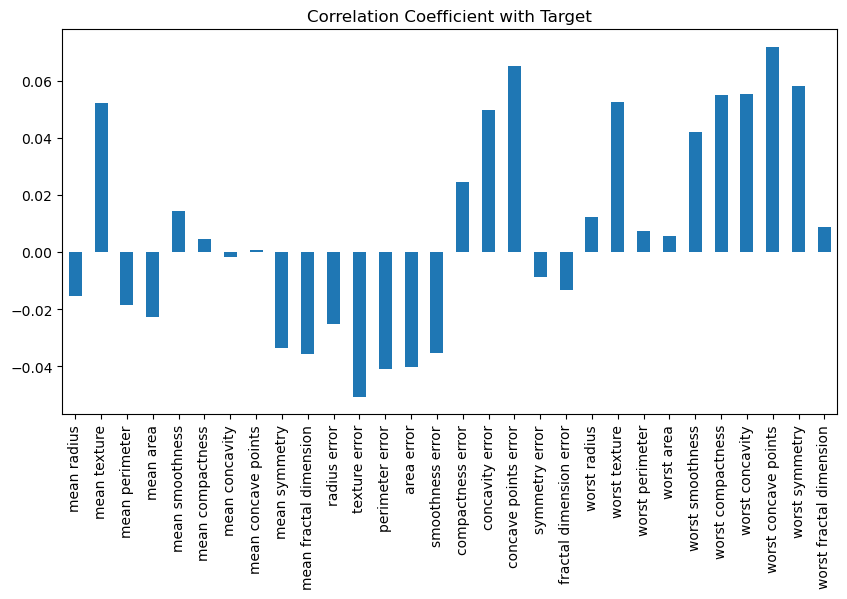

In [72]:
# Visualize Correlation Coefficients
plt.figure(figsize=(10, 5))
correlation_scores.plot(kind='bar', title='Correlation Coefficient with Target')
plt.show()

In [78]:
# Perform Feature Selection based on a threshold
correlation_threshold = 0.01
selected_features_corr = correlation_scores[correlation_scores.abs() > correlation_threshold].index
print("Selected Features using Correlation Coefficient:")
print(selected_features_corr)

Selected Features using Correlation Coefficient:
Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'fractal dimension error', 'worst radius',
       'worst texture', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')


In [79]:
### **Improvement After Correlation Coefficient Feature Selection**

# Train a model on the selected features from Correlation Coefficient
X_train_corr = X_train[selected_features_corr]
X_test_corr = X_test[selected_features_corr]
model_corr = RandomForestClassifier(n_estimators=50, random_state=42)
model_corr.fit(X_train_corr, y_train)
y_pred_corr = model_corr.predict(X_test_corr)
accuracy_corr = accuracy_score(y_test, y_pred_corr)
imp_corr = accuracy_corr - accuracy_full
print(f"Accuracy improvement after Correlation Coefficient feature selection: {imp_corr:.4f}")

Accuracy improvement after Correlation Coefficient feature selection: 0.0000


In [80]:
### **2. Embedded Methods**

# Embedded methods incorporate feature selection as part of the model training process. Here, we cover **L1 Regularization**.

In [81]:
#### **2.1. L1 Regularization (Lasso Regression)**

# L1 Regularization adds a penalty to the cost function that encourages sparse solutions, effectively selecting important features.

from sklearn.linear_model import Lasso

In [82]:
# Fit a Lasso model with L1 Regularization
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_train, y_train)

Lasso(alpha=0.01, random_state=42)

In [84]:
# Get the feature coefficients
lasso_coefficients = pd.Series(lasso.coef_, index=X_train.columns).sort_values(ascending=False)
print("Lasso Feature Coefficients (L1):")
print(lasso_coefficients)

Lasso Feature Coefficients (L1):
mean texture               0.002554
worst area                 0.000682
mean area                  0.000363
mean radius                0.000000
smoothness error          -0.000000
worst symmetry            -0.000000
worst concave points      -0.000000
worst compactness         -0.000000
worst smoothness          -0.000000
fractal dimension error   -0.000000
symmetry error            -0.000000
concave points error      -0.000000
concavity error           -0.000000
compactness error         -0.000000
perimeter error           -0.000000
texture error             -0.000000
radius error              -0.000000
mean fractal dimension    -0.000000
mean symmetry             -0.000000
mean concave points       -0.000000
mean concavity            -0.000000
mean compactness          -0.000000
mean smoothness           -0.000000
mean perimeter             0.000000
worst fractal dimension   -0.000000
area error                -0.000977
worst perimeter           -0.01

In [85]:
# Selected Features using Lasso Regression
selected_features_lasso = X_train.columns[lasso.coef_ != 0]
print("Selected Features using Lasso Regression (L1):")
print(selected_features_lasso)

Selected Features using Lasso Regression (L1):
Index(['mean texture', 'mean area', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity'],
      dtype='object')


In [93]:
# Train a model on the selected features from Lasso
X_train_lasso = X_train[selected_features_lasso]
X_test_lasso = X_test[selected_features_lasso]
model_lasso = RandomForestClassifier(n_estimators=50, random_state=42)
model_lasso.fit(X_train_lasso, y_train)
y_pred_lasso = model_lasso.predict(X_test_lasso)
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
imp_lasso = accuracy_lasso - accuracy_full
print(f"Accuracy after Lasso feature selection: {imp_lasso:.4f}")

Accuracy after Lasso feature selection: 0.0000


In [87]:
#### **2.2. Decision Tree Feature Selection**

# Decision Trees inherently perform feature selection by selecting the most informative features during the tree building process.

from sklearn.tree import DecisionTreeClassifier

In [89]:
# Train a Decision Tree model for feature selection
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [91]:
# Get feature importances from the trained Decision Tree model
feature_importances = pd.Series(decision_tree.feature_importances_, index=X_train.columns).sort_values(ascending=False)
selected_features_tree = feature_importances[feature_importances > 0].index
print("Selected Features using Decision Tree Feature Importance:")
print(selected_features_tree)

Selected Features using Decision Tree Feature Importance:
Index(['mean concave points', 'worst concave points', 'mean texture',
       'worst radius', 'worst perimeter', 'fractal dimension error',
       'worst texture', 'concave points error', 'area error',
       'worst smoothness', 'concavity error', 'smoothness error'],
      dtype='object')


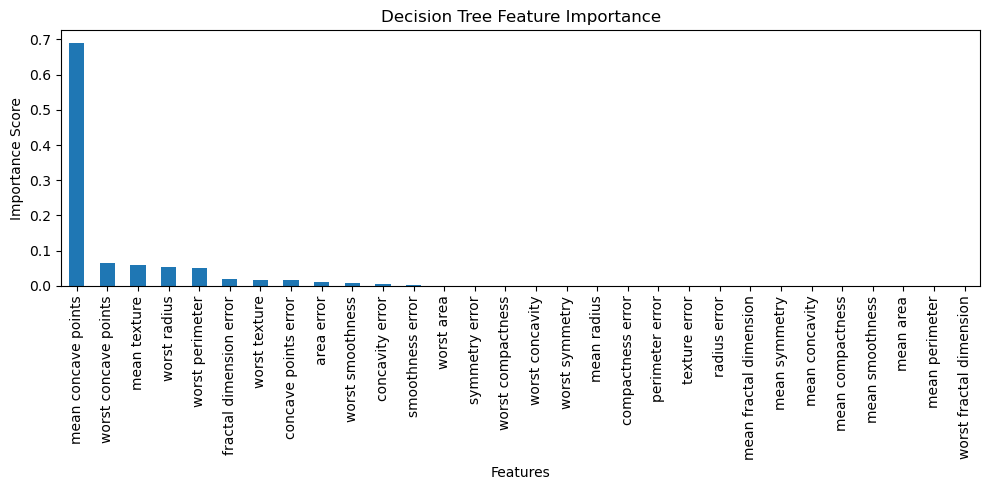

In [92]:
# Visualize Decision Tree Feature Importances
plt.figure(figsize=(10, 5))
feature_importances.plot(kind='bar', title='Decision Tree Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [94]:
# Train a model on the selected features from Decision Tree
X_train_tree = X_train[selected_features_tree]
X_test_tree = X_test[selected_features_tree]
model_tree = RandomForestClassifier(n_estimators=50, random_state=42)
model_tree.fit(X_train_tree, y_train)
y_pred_tree = model_tree.predict(X_test_tree)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
imp_tree = accuracy_tree - accuracy_full
print(f"Accuracy after Lasso feature selection: {imp_tree:.4f}")

Accuracy after Lasso feature selection: 0.0000


In [27]:
### **3. Wrapped Methods**

# Wrapped methods use machine learning models to evaluate and select features iteratively. We'll explore **Recursive Feature Elimination (RFE)**.

In [95]:
#### **3.1. Recursive Feature Elimination (RFE)**

# RFE is a popular wrapped method that recursively removes the least important features based on a given model until the desired number of features is reached.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [96]:
# Instantiate the base model
log_reg = LogisticRegression(max_iter=1000)

# Use RFE to select features
rfe = RFE(estimator=log_reg, n_features_to_select=10, step=1)
rfe.fit(X_train, y_train)

c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=10)

In [97]:
# Selected Features
selected_features_rfe = X_train.columns[rfe.support_]
print("Selected Features using RFE:")
print(selected_features_rfe)

Selected Features using RFE:
Index(['mean radius', 'mean compactness', 'mean concavity', 'texture error',
       'worst radius', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')


In [98]:
# Train a model on the selected features from RFE
X_train_rfe = X_train[selected_features_rfe]
X_test_rfe = X_test[selected_features_rfe]
model_rfe = RandomForestClassifier(n_estimators=50, random_state=42)
model_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = model_rfe.predict(X_test_rfe)
accuracy_rfe = accuracy_score(y_test, y_pred_rfe)
imp_rfe = accuracy_rfe - accuracy_full
print(f"Accuracy after RFE feature selection: {imp_rfe:.4f}")

Accuracy after RFE feature selection: -0.0088


In [18]:
#### **3.2. Permutation Feature Importance**

# Permutation importance evaluates the importance of each feature by shuffling its values and observing the effect on the model's performance.

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance

In [99]:
# Train a Random Forest model for evaluation (used as an example; permutation importance can be applied to any model to evaluate feature importance)
model = RandomForestClassifier(n_estimators=50, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=50, random_state=42)

In [100]:
# Calculate Permutation Feature Importance
# Note: `n_repeats` indicates the number of times a feature's value is shuffled to ensure stability in the importance score,
# and `random_state` helps ensure reproducibility of the results.
result = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)

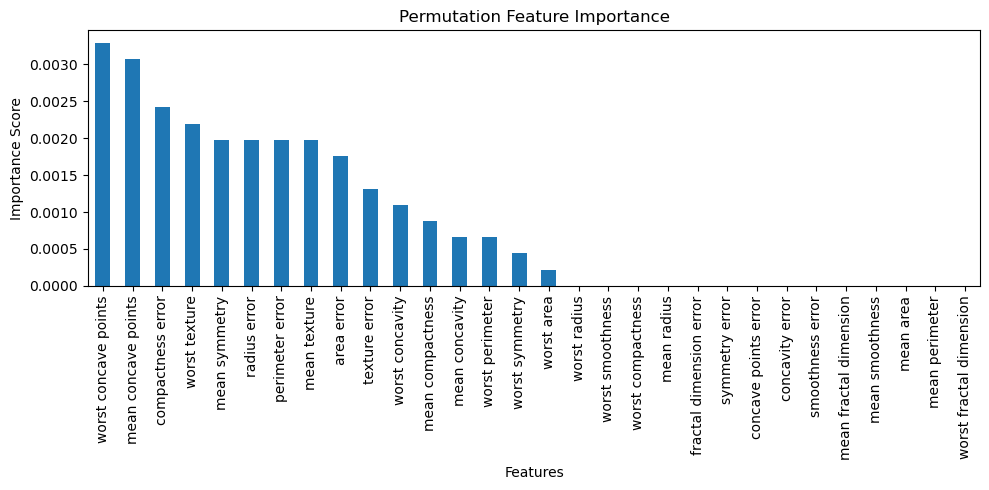

In [101]:
# Display Permutation Feature Importance
perm_importances = pd.Series(result.importances_mean, index=X_train.columns).sort_values(ascending=False)

# Visualize Permutation Feature Importance
plt.figure(figsize=(10, 5))
perm_importances.plot(kind='bar', title='Permutation Feature Importance')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [102]:
print("Permutation Feature Importance:")
print(perm_importances)

Permutation Feature Importance:
worst concave points       0.003297
mean concave points        0.003077
compactness error          0.002418
worst texture              0.002198
mean symmetry              0.001978
radius error               0.001978
perimeter error            0.001978
mean texture               0.001978
area error                 0.001758
texture error              0.001319
worst concavity            0.001099
mean compactness           0.000879
mean concavity             0.000659
worst perimeter            0.000659
worst symmetry             0.000440
worst area                 0.000220
worst radius               0.000000
worst smoothness           0.000000
worst compactness          0.000000
mean radius                0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
concavity error            0.000000
smoothness error           0.000000
mean fractal dimension     0.000000
mean smoothness            0.000

In [103]:
# Perform Feature Selection based on a threshold
perm_importance_threshold = 0.0
selected_features_perm = perm_importances[perm_importances > perm_importance_threshold].index
print("Selected Features using Permutation Feature Importance:")
print(selected_features_perm)

Selected Features using Permutation Feature Importance:
Index(['worst concave points', 'mean concave points', 'compactness error',
       'worst texture', 'mean symmetry', 'radius error', 'perimeter error',
       'mean texture', 'area error', 'texture error', 'worst concavity',
       'mean compactness', 'mean concavity', 'worst perimeter',
       'worst symmetry', 'worst area'],
      dtype='object')


In [104]:
# Train a model on the selected features from Permutation Importance
X_train_perm = X_train[selected_features_perm]
X_test_perm = X_test[selected_features_perm]
model_perm = RandomForestClassifier(n_estimators=50, random_state=42)
model_perm.fit(X_train_perm, y_train)
y_pred_perm = model_perm.predict(X_test_perm)
accuracy_perm = accuracy_score(y_test, y_pred_perm)
imp_perm = accuracy_perm - accuracy_full
print(f"Accuracy after Permutation Importance feature selection: {imp_perm:.4f}")

Accuracy after Permutation Importance feature selection: -0.0088


In [ ]:
### **4. Combining RFE with Nested Cross-Validation**

# Wrapped methods like RFE can be further combined with nested cross-validation to get more robust results and avoid data leakage.

In [34]:
from sklearn.model_selection import cross_val_score, KFold, GridSearchCV
from sklearn.pipeline import Pipeline
import seaborn as sns

In [36]:
# Define outer cross-validation
outer_cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Define inner cross-validation for hyperparameter tuning
inner_cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [37]:
# Set up the parameter grid for Logistic Regression (for demonstration purposes)
param_grid = {'classification__C': [0.01, 0.1, 1, 10]}

In [ ]:
# Create a pipeline to combine RFE and cross-validation
rfe_model = Pipeline([
    ('feature_selection', RFE(estimator=log_reg, n_features_to_select=5, step=1)),
    ('classification', LogisticRegression(max_iter=1000))
])

In [43]:
# Set up GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rfe_model, param_grid=param_grid, cv=inner_cv, n_jobs=-1, return_train_score=True)

# Fit the model to the entire dataset for visualization purposes
grid_search.fit(X, y)


c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('feature_selection',
                                        RFE(estimator=LogisticRegression(max_iter=1000),
                                            n_features_to_select=5)),
                                       ('classification',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1, param_grid={'classification__C': [0.01, 0.1, 1, 10]},
             return_train_score=True)

In [44]:
# Perform nested cross-validation
nested_scores = cross_val_score(GridSearchCV(estimator=rfe_model, param_grid=param_grid, cv=inner_cv, n_jobs=-1, return_train_score=True), X, y, cv=outer_cv)
print("Nested Cross-Validation Scores using RFE and GridSearch:")
print(nested_scores)
print(f"Average Nested CV Score: {np.mean(nested_scores):.4f}")

c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Nested Cross-Validation Scores using RFE and GridSearch:
[0.97368421 0.98245614 0.9122807  0.96491228 0.92035398]
Average Nested CV Score: 0.9507


c:\Users\liyan\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


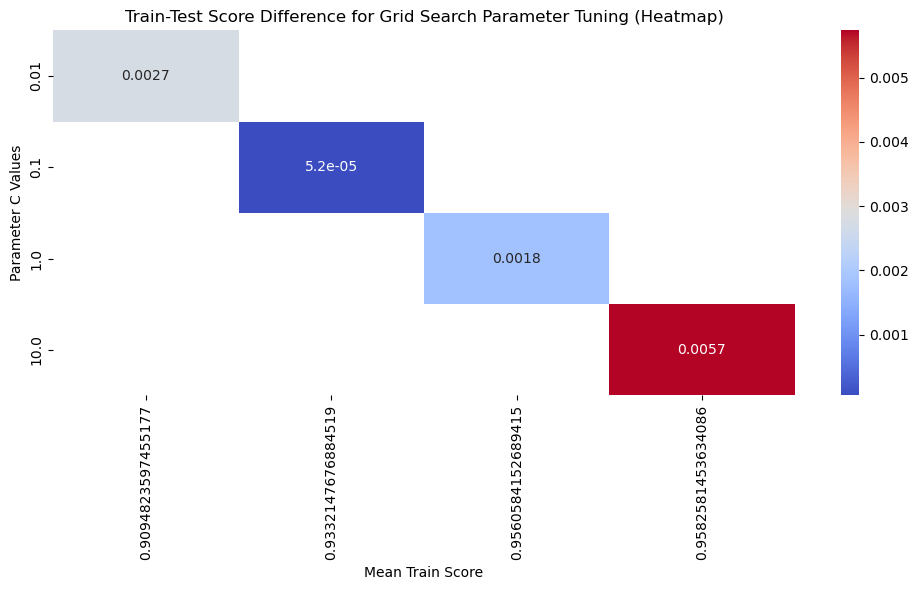

In [46]:
# Visualize Parameter Tuning Results with Train-Test Score Differences
results = pd.DataFrame(grid_search.cv_results_)

# Plot Train vs. Test Score Differences for Parameter Tuning
plt.figure(figsize=(10, 6))
results['score_difference'] = results['mean_train_score'] - results['mean_test_score']
sns.heatmap(results.pivot("param_classification__C", "mean_train_score", "score_difference"), annot=True, cmap="coolwarm", cbar=True)
plt.title('Train-Test Score Difference for Grid Search Parameter Tuning (Heatmap)')
plt.xlabel('Mean Train Score')
plt.ylabel('Parameter C Values')
plt.tight_layout()
plt.show()

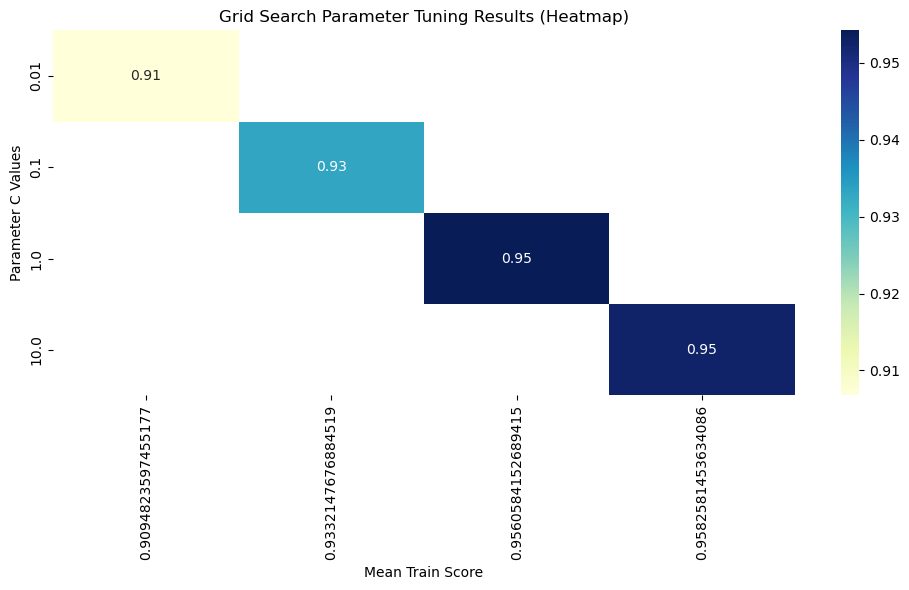

In [47]:
# Visualize Parameter Tuning Results with Heatmap
heatmap_data = results.pivot("param_classification__C", "mean_train_score", "mean_test_score")

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, cmap="YlGnBu", cbar=True)
plt.title('Grid Search Parameter Tuning Results (Heatmap)')
plt.xlabel('Mean Train Score')
plt.ylabel('Parameter C Values')
plt.tight_layout()
plt.show()

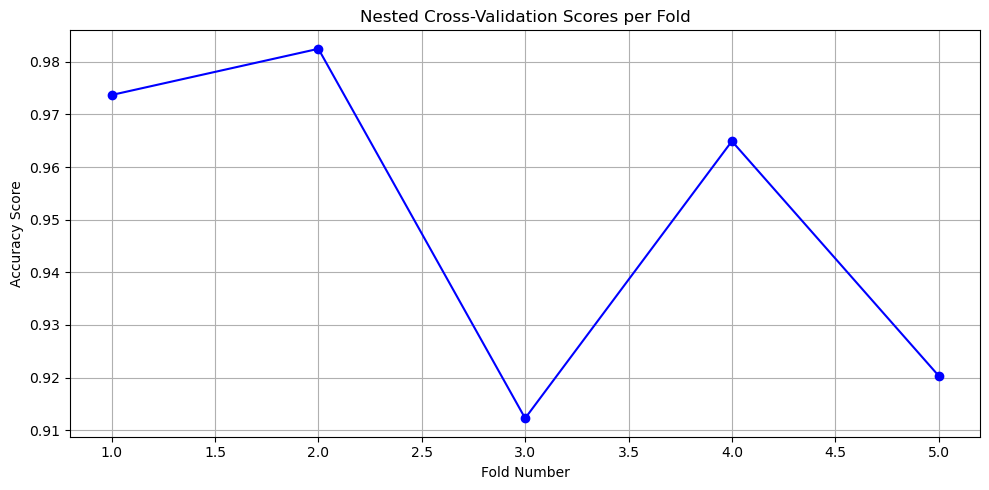

In [48]:
# Visualize Nested Cross-Validation Scores
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(nested_scores) + 1), nested_scores, marker='o', linestyle='-', color='b')
plt.title('Nested Cross-Validation Scores per Fold')
plt.xlabel('Fold Number')
plt.ylabel('Accuracy Score')
plt.grid(True)
plt.tight_layout()
plt.show()

In [49]:
### **5. Nested Cross-Validation with Permutation Importance**

# You can also use nested cross-validation in combination with permutation feature importance to obtain more robust importance scores.
from sklearn.model_selection import StratifiedKFold


In [50]:
# Define outer cross-validation strategy
outer_cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
perm_importances_cv = []

In [51]:
# Perform nested cross-validation and calculate permutation importance for each fold
for train_idx, test_idx in outer_cv.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]
    
    # Train the model using inner cross-validation
    grid_search_inner = GridSearchCV(estimator=rfe_model, param_grid=param_grid, cv=inner_cv, n_jobs=-1, return_train_score=True)
    grid_search_inner.fit(X_train, y_train)
    best_model = grid_search_inner.best_estimator_
    
    # Calculate permutation importance on the test set
    result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)
    perm_importances_cv.append(result.importances_mean)


c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\liyan\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [52]:
# Average permutation importance across all folds
avg_perm_importances = np.mean(perm_importances_cv, axis=0)
perm_importances_cv_series = pd.Series(avg_perm_importances, index=X.columns).sort_values(ascending=False)

In [53]:
# Display average permutation feature importance
print("Average Permutation Feature Importance from Nested Cross-Validation:")
print(perm_importances_cv_series)

Average Permutation Feature Importance from Nested Cross-Validation:
worst radius               0.383490
mean radius                0.053978
perimeter error            0.032456
worst concavity            0.018822
worst concave points       0.010877
texture error              0.005111
worst compactness          0.002469
worst symmetry             0.001228
concavity error            0.000000
worst smoothness           0.000000
worst area                 0.000000
worst perimeter            0.000000
worst texture              0.000000
fractal dimension error    0.000000
symmetry error             0.000000
concave points error       0.000000
compactness error          0.000000
mean texture               0.000000
smoothness error           0.000000
area error                 0.000000
radius error               0.000000
mean fractal dimension     0.000000
mean symmetry              0.000000
mean concave points        0.000000
mean concavity             0.000000
mean compactness           0.00

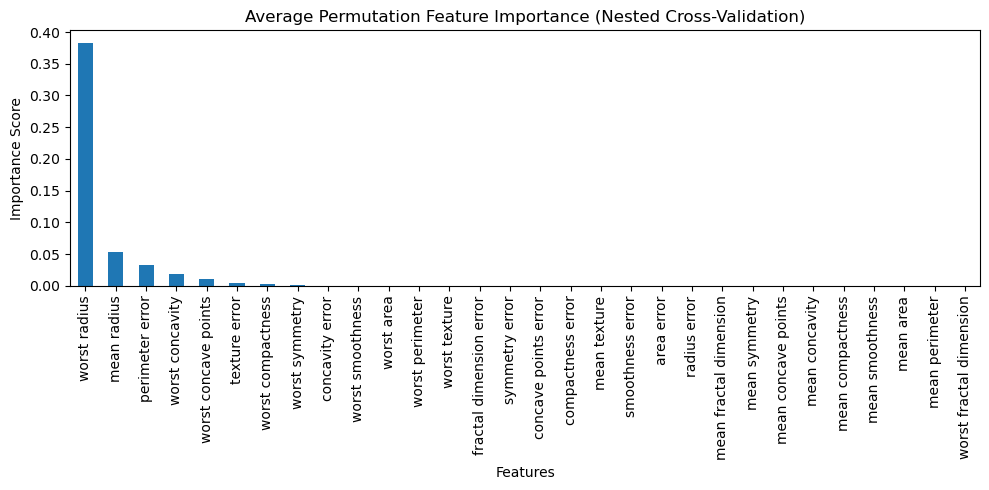

In [54]:
# Visualize the average permutation feature importance
plt.figure(figsize=(10, 5))
perm_importances_cv_series.plot(kind='bar', title='Average Permutation Feature Importance (Nested Cross-Validation)')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.tight_layout()
plt.show()

In [55]:
### **Exercise for Students**

# Write a simple Python function that takes a dataset (features and target) and performs feature selection using Lasso Regression (L1 Regularization). The function should:

# 1. Fit a Lasso model on the given data.
# 2. Print the names of the features with non-zero coefficients.
# 3. Visualize the selected features with a bar plot to enhance interpretability.

Selected Features with Lasso:
Index(['mean texture', 'mean area', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst concavity'],
      dtype='object')


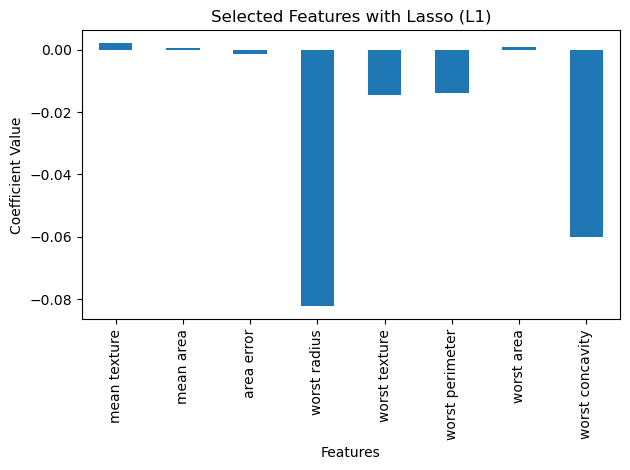

In [ ]:
# Example usage
lasso_feature_selection(X, y, alpha=0.01)
